## Name:
### ISMT S-136 Time Series Analysis with Python   
### Part II of Assignment 6

## Preface
In this Assignment we will use .fit() and .predict() methods of statsmodels.tsa.arima_model to estimate ARMA(p,q) model parameters and then predict observations, respectively. 

The example below demonstrates how one can estimate parameters of an AR(2) model by using .fit() method, where we specify order=(2,0,0) and method='css', which corresponds to maximization of the conditional sum of squares likelihood (we will discuss details). From the summary output we can see that based on $n=80$ observations, the estimates of parameters $\phi_1=1.8$ and $\phi_2=-0.9$ of AR(2) are $1.6805$ and $-0.7965$. Please notice that both roots of the AR polynomial are outside of the unit cIrcle (see "Modulus"): 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA

# generate n observations of AR(2)
phi =   np.array([1.8, -0.9])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1    
np.random.seed(1678)
sigma = 1.0
n=80
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

# estimate parameters of AR(2) based on the sample run xt of n observations
p = 2
model = ARIMA(xt, order=(p,0,0))
model_fit = model.fit(method='css')
print(model_fit.summary())



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   80
Model:                     ARMA(2, 0)   Log Likelihood                 -94.329
Method:                           css   S.D. of innovations              0.811
Date:                Mon, 12 Jul 2021   AIC                            196.657
Time:                        14:01:35   BIC                            206.084
Sample:                             2   HQIC                           200.431
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3518      0.797      1.696      0.094      -0.210       2.914
ar.L1.y        1.6805      0.072     23.325      0.000       1.539       1.822
ar.L2.y       -0.7965      0.074    -10.726      0.0

Using the estimated coefficients, we now can compute "fitted values" and "forecasts" via the .predict() method. The "fitted values" are one step ahead predictions, which in fact use future information for estimating the coefficients. The error associated with "fitted values" should be seen as "train error." "Forecasts," in contrast, are predictions of truly new observations, which where not used for estimating the coefficients of the model:

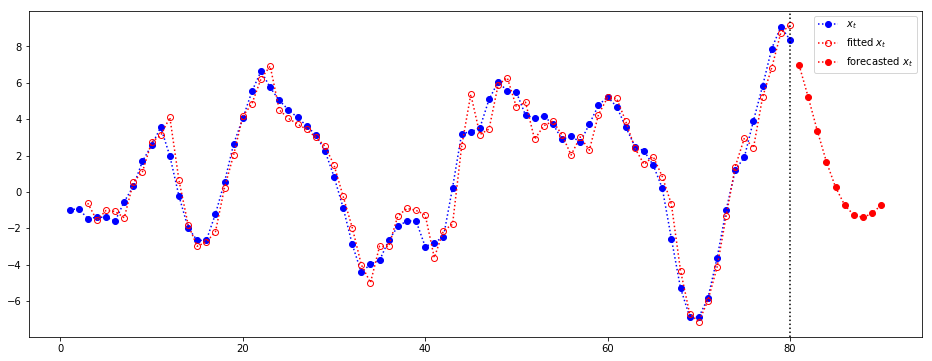

In [2]:
# check n fitted values
xt_fitted = model_fit.predict()
plt.figure(figsize=(16,6))
plt.plot(range(1,n+1),xt,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(range(p+1,n+1),xt_fitted,linestyle=':', marker='o', mfc='none', color='red',label = "fitted $x_t$")

# forecast m steps ahead starting from n+1
m=10
xt_forecasted = model_fit.predict(start=n+1, end=n+m-1)
xt_forecasted
plt.axvline(x=n,linestyle=':',color='k')
plt.plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$")
plt.legend()

## Problem 1 (10 points)
Please pick causal AR(3) of your choice. Explicitly demonstrate that the process is causal. Generate the time series $x_t$ of $n=100$ observations. Compute the "fitted values" for $t=4,5,\ldots,n$ and "forecasts" of $x_t$ for $t=n+1,n+2,\ldots,n+m$. Plot the time series realization $x_t$, "fitted values," and "forecasts" in one graph clearly differentiating between the cases by using color/shape. Please add the label and title indicating the name of the model and parameters you picked.

SOLUTION:

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA

# generate n observations of AR(3)
phi =   np.array([0.5, 0.3, 0.1])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1    
arma_process_AR = smt.ArmaProcess(ar, ma)

np.random.seed(123)
n=100
xt_AR = smt.arma_generate_sample(ar=ar, ma=ma, scale=sigma, nsample=n)

# estimate parameters of AR(3) based on the sample run xt of n observations
p = 3
model_AR = ARIMA(xt_AR, order=(p,0,0))
model_fit_AR = model_AR.fit(method='css')
print('AR(3) process is causal:', arma_process_AR.isstationary)
print('\n')
print(model_fit_AR.summary())

AR(3) process is causal: True


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(3, 0)   Log Likelihood                -149.587
Method:                           css   S.D. of innovations              1.131
Date:                Fri, 16 Jul 2021   AIC                            309.173
Time:                        15:50:53   BIC                            322.047
Sample:                             3   HQIC                           314.379
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2796      0.929      0.301      0.763      -1.541       2.100
ar.L1.y        0.4938      0.100      4.925      0.000       0.297       0.690
ar.L2.y        0.222

## Problem 2 (10 points)
Repeat Problem 1 for invertible MA(3) of your choice. Explicitly demonstrate that your choice of parameters corresponds to an invertible process. Please notice that in the case of MA(3) the order needs to be specified as follows: order=(0,0,3).

SOLUTION:

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA

# generate n observations of MA(3)
phi =   np.array([0.])
theta = np.array([0.5, 0.3, 0.1])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1    
arma_process_MA = smt.ArmaProcess(ar, ma)

np.random.seed(123)
n=100
xt_MA = smt.arma_generate_sample(ar=ar, ma=ma, scale=sigma, nsample=n)

# estimate parameters of MA(3) based on the sample run xt of n observations
q = 3
model_MA = ARIMA(xt_MA, order=(0,0,q))
model_fit_MA = model_MA.fit(method='css')
print('MA(3) process is invertible:', arma_process_MA.isinvertible)
print('\n')
print(model_fit_MA.summary())

MA(3) process is invertible: True


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(0, 3)   Log Likelihood                -151.826
Method:                           css   S.D. of innovations              1.104
Date:                Fri, 16 Jul 2021   AIC                            313.652
Time:                        15:50:58   BIC                            326.678
Sample:                             0   HQIC                           318.924
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0288      0.231      0.125      0.901      -0.423       0.481
ma.L1.y        0.5371      0.098      5.507      0.000       0.346       0.728
ma.L2.y        0

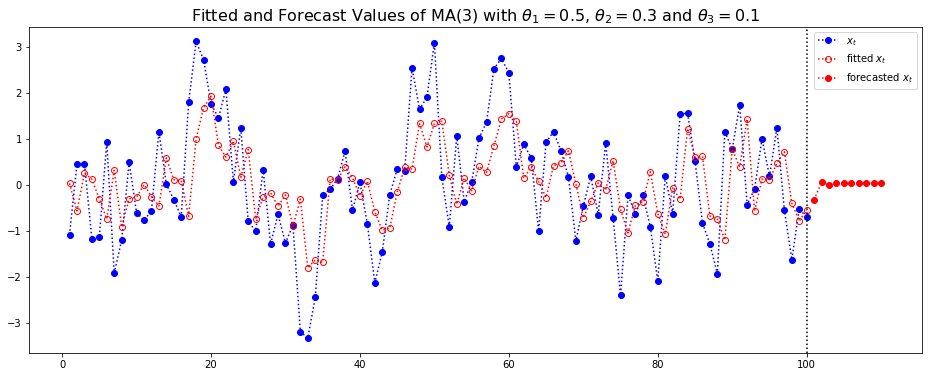

In [76]:
# check n fitted values
xt_fitted_MA = model_fit_MA.predict()
plt.figure(figsize=(16,6))
plt.plot(range(1,n+1),xt_MA,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(range(1,n+1),xt_fitted_MA,linestyle=':', marker='o', mfc='none', color='red',label = "fitted $x_t$")

# forecast m steps ahead starting from n+1
m=10
xt_forecasted_MA = model_fit_MA.predict(start=n+1, end=n+m-1)
xt_forecasted_MA
plt.axvline(x=n,linestyle=':',color='k')
plt.title('Fitted and Forecast Values of MA(3) with $\\theta_1 = 0.5$, $\\theta_2 = 0.3$ and $\\theta_3 = 0.1$', size = 16)
plt.plot(range(n+1,n+m+1), xt_forecasted_MA, linestyle=':', marker='o',color='red',label = "forecasted $x_t$")
plt.legend()
plt.show()